## Project: Image Classification:

### The main objective of the project is to build a model to classify the given image

Loading required Libraries

In [4]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, Image
from PIL import Image

### When analyzing images, our initial task often involves recognizing individuals through facial features. Images may feature multiple faces, and sometimes these faces might be partially obscured or not clearly visible. Our preprocessing pipeline begins by identifying faces within the image. After successfully detecting a face, we proceed to detect eyes. Only when both eyes are detected do we retain the image; otherwise, it is discarded.

### Loading an Image

For detecting face and eyes I will use open cv.

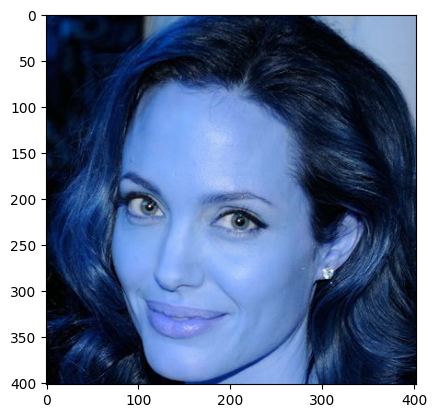

In [5]:
img = cv2.imread("Dataset/Angelina Joli/angel.jpg")
plt.imshow(img)
plt.show()

In [6]:
#Converting the image to gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(402, 402)

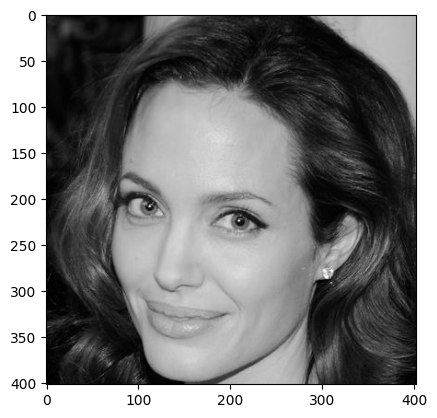

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
gray

array([[ 45,  46,  44, ..., 177, 177, 177],
       [ 40,  42,  41, ..., 177, 177, 177],
       [ 38,  40,  40, ..., 177, 177, 177],
       ...,
       [  4,   2,   1, ...,   7,   5,   5],
       [  3,   3,   3, ...,   6,   4,   4],
       [  4,   3,   3, ...,   6,   4,   4]], dtype=uint8)

In [9]:
face_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('opencv/haarcascades/haarcascade_eye.xml')

In [10]:
face = face_cascade.detectMultiScale(gray, 1.3, 5)
face

array([[ 38, 117, 257, 257]])

In [11]:
(x,y,w,h) = face[0]
x,y,w,h

(38, 117, 257, 257)

Detecting Face

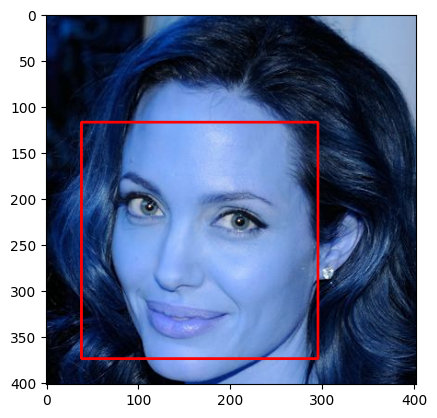

In [13]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)
plt.show()

Detecting face and eyes

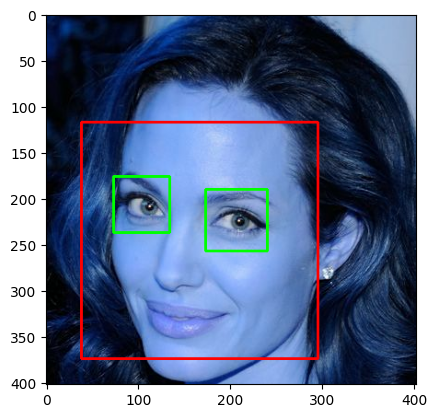

In [14]:
cv2.destroyAllWindows()
for (x,y,w,h) in face:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

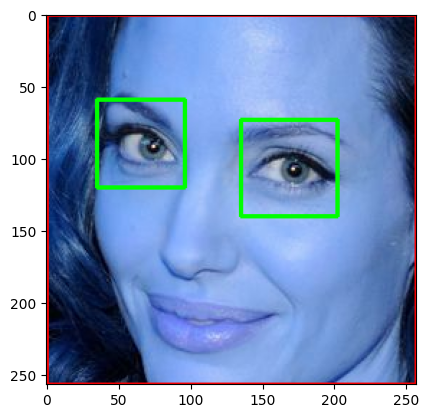

In [17]:
#Plotting the cropped Image
%matplotlib inline
plt.imshow(roi_color, cmap='gray')
plt.show()

In [25]:
cropped_img = np.array(roi_color)
cropped_img.shape

(257, 257, 3)

Performing a 2D wavelet transform on an image.   
The purpose of this code is to apply a 2D wavelet transform to an input image, which can be useful in various image processing tasks, including denoising, compression, and feature extraction. The specific wavelet used and the level of decomposition can be adjusted according to the requirements of the task.

In [26]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

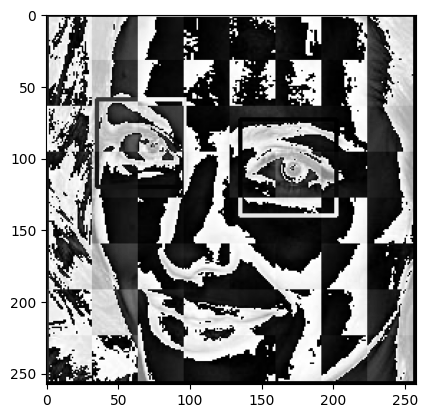

In [27]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [28]:
#Defining a function to get the cropped images
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

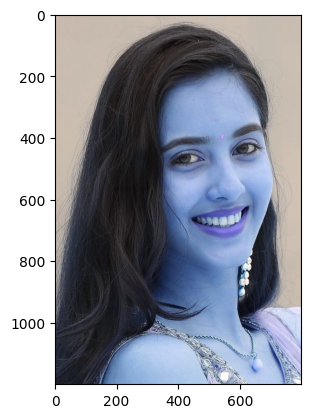

In [29]:
original_image = cv2.imread('Dataset/Simrat Kaur/simrat23.jpg')
plt.imshow(original_image)

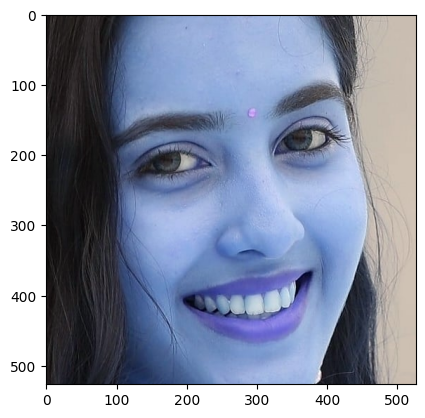

In [30]:
plt.imshow(get_cropped_image_if_2_eyes('Dataset/Simrat Kaur/simrat23.jpg'))

In [42]:
path_to_data= 'Dataset/'  #path from where we can get the images
path_to_cr_data = 'Dataset/cropped/' # path where we will store the cropped images

In [43]:
import os
img_dirs= []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [44]:
img_dirs

['Dataset/Angelina Joli',
 'Dataset/Hande Ercel',
 'Dataset/Jethalal',
 'Dataset/John Statham',
 'Dataset/Milana Nagaraj',
 'Dataset/Pooja Hegde',
 'Dataset/Simrat Kaur']

Iterate through all the images in the "dataset" folder and generate cropped versions of each image. After executing this code, a new folder named "cropped" will be created inside the "dataset" folder to store the cropped images.

In [45]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [46]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  Dataset/cropped/Angelina Joli
Generating cropped images in folder:  Dataset/cropped/Hande Ercel
Generating cropped images in folder:  Dataset/cropped/Jethalal
Generating cropped images in folder:  Dataset/cropped/John Statham
Generating cropped images in folder:  Dataset/cropped/Milana Nagaraj
Generating cropped images in folder:  Dataset/cropped/Pooja Hegde
Generating cropped images in folder:  Dataset/cropped/Simrat Kaur


Following the execution of the code, you should find a "cropped" folder located within the "datasets" directory, and within this "cropped" folder, you will discover the cropped images.

In [47]:
class_dict = {}
count = 0 
for celebrity in celebrity_file_names_dict.keys():
    class_dict[celebrity] = count
    count +=1
class_dict

{'Angelina Joli': 0,
 'Hande Ercel': 1,
 'Jethalal': 2,
 'John Statham': 3,
 'Milana Nagaraj': 4,
 'Pooja Hegde': 5,
 'Simrat Kaur': 6}

The images contained within the "cropped" folder are suitable for training our model. Our approach involves utilizing both the original, unaltered images and their corresponding wavelet-transformed versions to prepare the dataset for model training. To accomplish this, we will construct the feature matrix (X) and the corresponding label array (y).

In [48]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

In [49]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(178, 4096)

In [54]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
import warnings
warnings.simplefilter("ignore")

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7555555555555555

In [55]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.40      0.40      0.40         5
           1       0.57      0.57      0.57         7
           2       0.82      0.93      0.87        15
           3       0.91      1.00      0.95        10
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.80      0.80      0.80         5

    accuracy                           0.76        45
   macro avg       0.50      0.53      0.51        45
weighted avg       0.70      0.76      0.73        45



In [56]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [57]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

Using GridSeachCV for finding the best model

In [58]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.699145,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.541880,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.698860,{'logisticregression__C': 1}


In [61]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [63]:
best_estimators['svm'].score(X_test,y_test)

0.7111111111111111

In [64]:
best_estimators['random_forest'].score(X_test,y_test)

0.6

In [65]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8

In [66]:
best_clf = best_estimators['svm']
best_clf

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=1, gamma='auto', kernel='linear', probability=True))])

In [67]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 2,  3,  0,  0,  0,  0,  0],
       [ 1,  3,  0,  0,  0,  1,  2],
       [ 1,  0, 14,  0,  0,  0,  0],
       [ 1,  0,  0,  9,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  2,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  4]], dtype=int64)

In [69]:
class_dict

{'Angelina Joli': 0,
 'Hande Ercel': 1,
 'Jethalal': 2,
 'John Statham': 3,
 'Milana Nagaraj': 4,
 'Pooja Hegde': 5,
 'Simrat Kaur': 6}

### Saving the model

In [70]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

### Save class dictionary

In [71]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))